In [1]:
!python datasets.py

In [2]:
import math
import numpy as np
import scipy
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as skl
import io
import pickle

from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.dummy import DummyRegressor

from sklearn.linear_model import Lasso
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance

In [3]:


import datasets

DS = datasets.Datasets()



In [4]:
nonTwitterDf = DS.non_twitter_df

In [5]:
import math
## maybe balance the number of tweets from each?
dfH = nonTwitterDf.loc[nonTwitterDf['Candidate']=='HC',:]
print("HC length: ",len(dfH))

dfT =nonTwitterDf.loc[nonTwitterDf['Candidate']=='DT',:]
print("DT length: ",len(dfT))

#print(.5*(len(dfT)/len(dfH))

df_new = nonTwitterDf

#df_new = df.append(dfH)
df_new = df_new.append(dfH)
#df_new = df_new.append(dfH[:math.floor(len(dfH)*.33)])
print("DT length ratio: ",len(dfT)/len(df_new))

nonTwitterDf = df_new

HC length:  1352
DT length:  2509
DT length ratio:  0.48129675810473815


In [6]:
##sum(list(twitter.loc[:,"Num Prop"]==0))## this confirms that there is always at least one instance of propaganda

In [7]:
from sklearn.model_selection import train_test_split

X = nonTwitterDf.loc[:,'Loaded_Language':'Thought-terminating_Cliches',]
Y = nonTwitterDf.loc[:,"BCandidate"]


X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = .2,shuffle=True)

In [8]:
from sklearn import linear_model

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.dummy import DummyRegressor

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
#models.append(('SVM', SVC(gamma='auto'))) 
models.append(('ETC', ExtraTreesClassifier(n_estimators=100, random_state=0)))
models.append(('RFC', RandomForestClassifier(max_depth= 2, random_state = 0)))  
models.append(('null0', DummyRegressor(strategy="constant", constant= 0)))
models.append(('null1', DummyRegressor(strategy="constant", constant= 1)))


results = []
names = []
roc_auc= []
fitted_mods=[]
conf_mat= []
predictions = []


for name, model in models: 
    print(model)
    print(name)
    fitted_mods.append(model.fit(X_train, Y_train))
 
    names.append(name)
    
for i in fitted_mods: 
	roc_auc.append(roc_auc_score(Y_test,i.predict(X_test)))
	results.append(accuracy_score(Y_test, i.predict(X_test)))

#	conf_mat.append(confusion_matrix(Y_test, i.predict(X_test)))
 
	predictions.append(i.predict(X_test))
 
#print(roc_auc)
print(results)
print(conf_mat)
print(predictions)

LogisticRegression(multi_class='ovr', solver='liblinear')
LR
ExtraTreesClassifier(random_state=0)
ETC
RandomForestClassifier(max_depth=2, random_state=0)
RFC
DummyRegressor(constant=0, strategy='constant')
null0
DummyRegressor(constant=1, strategy='constant')
null1
[0.538830297219559, 0.5417066155321189, 0.5426653883029722, 0.5302013422818792, 0.4697986577181208]
[]
[array([0, 1, 0, ..., 0, 0, 0], dtype=int64), array([0, 1, 0, ..., 0, 0, 0], dtype=int64), array([0, 1, 0, ..., 0, 0, 0], dtype=int64), array([0, 0, 0, ..., 0, 0, 0]), array([1, 1, 1, ..., 1, 1, 1])]


LR accuracy: 0.538830297219559 roc auc: 0.5232498062516147
ETC accuracy: 0.5417066155321189 roc auc: 0.5250322913975717
RFC accuracy: 0.5426653883029722 roc auc: 0.5207052441229656
null0 accuracy: 0.5302013422818792 roc auc: 0.5
null1 accuracy: 0.4697986577181208 roc auc: 0.5


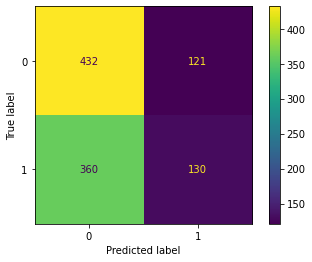

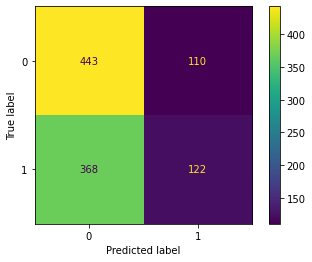

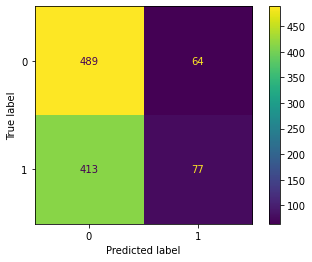

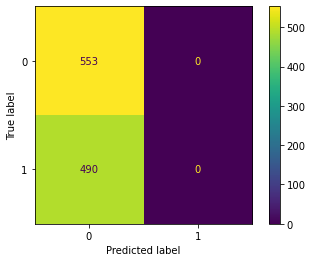

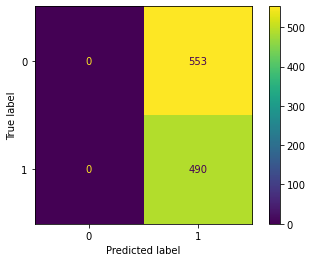

In [9]:
## printing imporant stats
for i in range(len(names)):
  print(names[i],'accuracy:' , results[i], 'roc auc:',roc_auc[i])
  cm = confusion_matrix(Y_test,predictions[i])
  ConfusionMatrixDisplay(cm).plot()

plt.show()

# cross validated gridsearches:

## C-Support Vector Classification

In [7]:
granularity1 = 10 ## make smaller when running on a more powerful computer

In [11]:
from sklearn.model_selection import GridSearchCV
# support vector machine

SVCCV = GridSearchCV(
SVC(gamma='auto'), param_grid = { 
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'C' : list(range(1,30))


})

SVCCV.fit(X_train,Y_train)

GridSearchCV(estimator=SVC(gamma='auto'),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                               15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
                               27, 28, 29],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [12]:
filename = 'SVC_GS_nontwitter'
pickle.dump(SVCCV, open(filename,'wb'))

In [13]:
##reading in trained model
loaded_model = pickle.load(open(filename, 'rb'))


SVC_GS_nontwitter results on test data
roc_auc: 0.5260785326788943
accurarcy: 0.5417066155321189
note 1 is Donald Trump


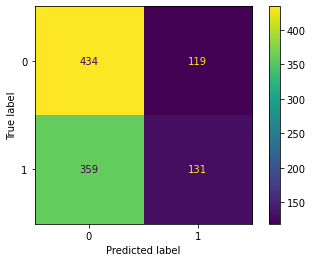

In [14]:
print(filename+" results on test data")
print("roc_auc:",roc_auc_score(Y_test,loaded_model.predict(X_test)))
print("accurarcy:",accuracy_score(Y_test,loaded_model.predict(X_test)))
print("note 1 is Donald Trump")
cm = confusion_matrix(Y_test,loaded_model.predict(X_test))
ConfusionMatrixDisplay(cm).plot()


## extra trees

In [15]:
## add logic: if extra trees run: elif: ... 

#set hypothisis
# gridsearch
#### if model == 'extra trees' then param_grid = ...  
ETCV = GridSearchCV(ExtraTreesClassifier(),param_grid = {
    'n_estimators' : list(range(1,100,granularity1)),# no real benefit from 1,100
    'random_state' : list(range(1,100,granularity1))
})

ETCV.fit(X_train,Y_train)

filename = 'extra_trees_GS_nontwitter' ## filename =  method_something something will be found in the config file
pickle.dump(ETCV, open(filename,'wb')) 

extra_trees_GS_nontwitter results on test data
roc_auc: 0.5258202014983208
accurarcy: 0.5426653883029722
note 1 is Donald Trump


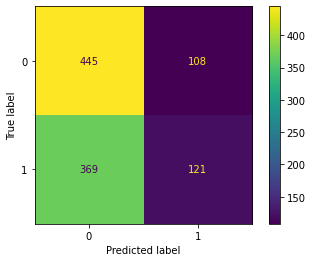

In [16]:
filename = 'extra_trees_GS_nontwitter'
loaded_model = pickle.load(open(filename, 'rb'))

print(filename+" results on test data")
print("roc_auc:",roc_auc_score(Y_test,loaded_model.predict(X_test)))
print("accurarcy:",accuracy_score(Y_test,loaded_model.predict(X_test)))
print("note 1 is Donald Trump")
cm = confusion_matrix(Y_test,loaded_model.predict(X_test))
ConfusionMatrixDisplay(cm).plot()

scoring = ['roc_auc', 'accuracy']#
r_multi = permutation_importance(
    ETCV, X_test, Y_test, n_repeats=30, random_state=0, scoring=scoring)

features= list(nonTwitterDf.columns)[6:-2]
roc_auc_importance = []
roc_auc_std = []
acc_importance =[]
acc_std=[]
for metric in r_multi:
    print(f"{metric}")
    r = r_multi[metric]
    for i in range(len(features)):
        #if r.importances_mean[i] - 2 * r.importances_std[i] > 0: ## do we want to know this?
        print(i,f"    {list(nonTwitterDf.columns)[6:-2][i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")
        if metric == 'roc_auc':
            roc_auc_importance.append(r.importances_mean[i])
            roc_auc_std.append(r.importances_std[i])
        if metric == 'accuracy': 
            acc_importance.append(r.importances_mean[i])
            acc_std.append(r.importances_std[i])

NameError: name 'features' is not defined

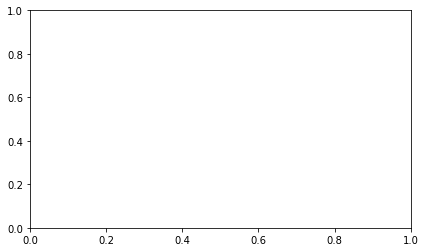

In [3]:

plt.figure(figsize=(15, 4))# this adjusts how far away the plots are from eachother

ax = plt.subplot(121)
ax.bar(features,acc_importance)
plt.xticks(rotation = 'vertical')
ax.set_title("Feature importance of Random Forest based on accuracy")
ax.set_ylabel("permutation importance")

ax = plt.subplot(122)## this is to put them next to each other and needs to be 1 integer greater
ax.bar(features,roc_auc_importance)
plt.xticks(rotation = 'vertical')
ax.set_title("Feature importance of Random Forest based on roc_auc")
ax.set_ylabel("permutation importance")
plt.show()

In [18]:
ET = ExtraTreesClassifier(n_estimators =ETCV.best_params_['n_estimators'],random_state = ETCV.best_params_['random_state'] )
ET.fit(X_train,Y_train)

ExtraTreesClassifier(n_estimators=11, random_state=1)

Feature ranking:
1. feature 15 (0.336976) name: Thought-terminating Cliches
2. feature 0 (0.149532) name: Num Prop
3. feature 6 (0.080241) name: Doubt
4. feature 3 (0.070321) name: Exaggeration,Minimisation
5. feature 12 (0.058792) name: Slogans
6. feature 2 (0.057957) name: Flag-Waving
7. feature 4 (0.045770) name: Whataboutism,Straw_Men,Red_Herring
8. feature 5 (0.041293) name: Repetition
9. feature 9 (0.037137) name: Black-and-White_Fallacy
10. feature 10 (0.031310) name: Causal_Oversimplification
11. feature 7 (0.031209) name: Appeal_to_fear-prejudice
12. feature 1 (0.029964) name: Loaded_Language
13. feature 8 (0.018816) name: Appeal_to_Authority
14. feature 14 (0.009711) name: Thought-terminating_Cliches
15. feature 16 (0.000970) name: Obfuscation,Intentional_Vagueness,Confusion
16. feature 11 (0.000000) name: Name_Calling,Labeling
17. feature 13 (0.000000) name: Bandwagon,Reductio_ad_hitlerum


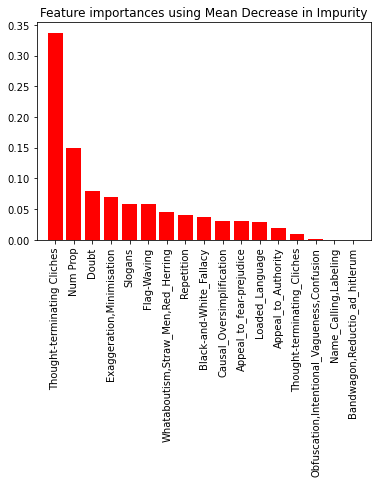

In [19]:
importances = ET.feature_importances_
std = np.std([ET.feature_importances_ for tree in ET.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
feature_list = [X.columns[indices[f]] for f in range(X.shape[1])]  #names of features.
ff = np.array(feature_list)

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f) name: %s" % (f + 1, indices[f], importances[indices[f]], ff[indices[f]]))

    
plt.figure()
plt.rcParams['figure.figsize'] = [16, 6]
plt.title("Feature importances using Mean Decrease in Impurity")## MDI
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), ff[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

C:\Users\theot\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:394: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  ax = boxplot(


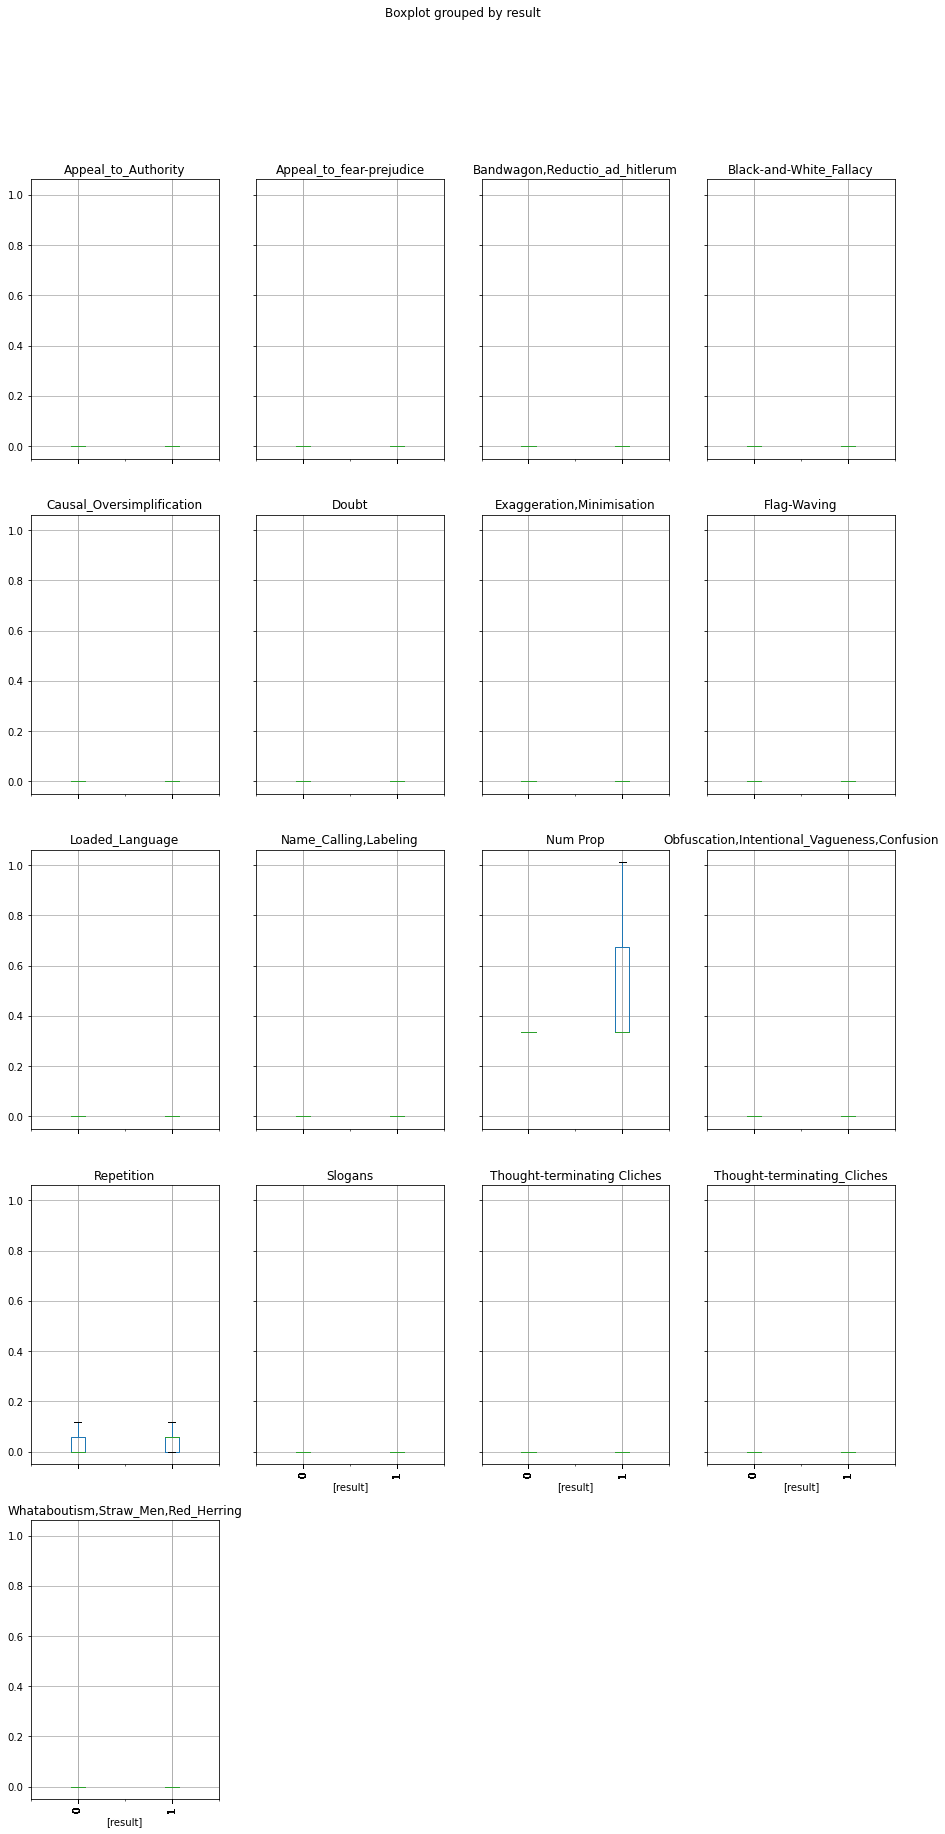

In [20]:
dummy_df1 = pd.DataFrame(X_train.loc[Y_train==1, :]*importances)## trump should be predicted 
dummy_df1 = dummy_df1.assign(result =lambda Candidate	: '1')

dummy_df0 = pd.DataFrame(X_train.loc[Y_train==0, :]*importances)#hillary should be predicted
dummy_df0 = dummy_df0.assign(result =lambda Candidate	: '0')


dummy_df = dummy_df1.append(dummy_df0)



plt.figure(figsize=(15, 30))# this adjusts how far away the plots are from eachother

ax = plt.subplot(121)



#dummy_df.plot(kind = 'box', by = 'result')## you can only have kind or by 
dummy_df.boxplot( meanline = True, by = 'result', figsize = (5,15), rot = 90, ax = ax, showfliers = False)## you can only have kind or by 
#plt.xticks(rotation= 'vertical')
plt.ylim(-.1,.5)
plt.show()

## random forest

In [6]:
RFCV = GridSearchCV(RandomForestClassifier(), param_grid={ 
    'n_estimators' : list(range(1,100,granularity1)),
    'max_depth': list(range(2,100,granularity1)),
    'random_state': list(range(10,100,granularity1))

})
RFCV.fit(X_train,Y_train)

filename = 'RFCV_GS_nontwitter'
pickle.dump(RFCV, open(filename,'wb'))


NameError: name 'granularity1' is not defined

In [5]:
filename = 'RFCV_GS_nontwitter'

loaded_model = pickle.load(open(filename, 'rb'))

print(filename+" results on test data")
print("roc_auc:",roc_auc_score(Y_test,loaded_model.predict(X_test)))
print("accurarcy:",accuracy_score(Y_test,loaded_model.predict(X_test)))
print("note 1 is Donald Trump")
cm = confusion_matrix(Y_test,loaded_model.predict(X_test))
ConfusionMatrixDisplay(cm).plot()

FileNotFoundError: [Errno 2] No such file or directory: 'RFCV_GS_nontwitter'

In [4]:
## source: https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-importance



scoring = ['roc_auc', 'accuracy']#
r_multi = permutation_importance(
    RFCV, X_test, Y_test, n_repeats=30, random_state=0, scoring=scoring)

features= list(nonTwitterDf.columns)[6:-2]
roc_auc_importance = []
roc_auc_std = []
acc_importance =[]
acc_std=[]
for metric in r_multi:
    print(f"{metric}")
    r = r_multi[metric]
    for i in range(len(features)):
        #if r.importances_mean[i] - 2 * r.importances_std[i] > 0: ## do we want to know this?
        print(i,f"    {list(nonTwitterDf.columns)[6:-2][i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")
        if metric == 'roc_auc':
            roc_auc_importance.append(r.importances_mean[i])
            roc_auc_std.append(r.importances_std[i])
        if metric == 'accuracy': 
            acc_importance.append(r.importances_mean[i])
            acc_std.append(r.importances_std[i])

NameError: name 'RFCV' is not defined

In [ ]:

plt.figure(figsize=(15, 4))# this adjusts how far away the plots are from eachother

ax = plt.subplot(121)
ax.bar(features,acc_importance)
plt.xticks(rotation = 'vertical')
ax.set_title("Feature importance of Random Forest based on accuracy")
ax.set_ylabel("permutation importance")

ax = plt.subplot(122)## this is to put them next to each other and needs to be 1 integer greater
ax.bar(features,roc_auc_importance)
plt.xticks(rotation = 'vertical')
ax.set_title("Feature importance of Random Forest based on roc_auc")
ax.set_ylabel("permutation importance")
plt.show()


## lasso

In [ ]:
LOCV = GridSearchCV( linear_model.Lasso(), param_grid={ 
    'alpha' : list(np.arange (.1, 50, .1))

})
LOCV.fit(X_train,Y_train)

filename = 'lasso_GS_nontwitter'
pickle.dump(LOCV, open(filename,'wb')) 

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))

print(filename+" results on test data")
print("roc_auc:",roc_auc_score(Y_test,loaded_model.predict(X_test)))
print("accurarcy:",accuracy_score(Y_test,loaded_model.predict(X_test)))
print("note 1 is Donald Trump")
cm = confusion_matrix(Y_test,loaded_model.predict(X_test))
ConfusionMatrixDisplay(cm).plot()

In [ ]:
## no feature importance?
## everything is 0 when computed 

## neural net- may need to adjust parameters

In [ ]:
NNCV = GridSearchCV( MLPClassifier(max_iter=10000), param_grid={ 
    'solver' : ['lbfgs', 'sgd', 'adam'],
    'alpha' : [1e-5,1e-4,1e-3,1e-2],
    'activation': ['tanh', 'relu'],
    'learning_rate': ['constant','adaptive'],

})
NNCV.fit(X_train,Y_train)

filename = 'NNCV_GS_nontwitter'
pickle.dump(NNCV, open(filename,'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))

print(filename+" results on test data")
print("roc_auc:",roc_auc_score(Y_test,loaded_model.predict(X_test)))
print("accurarcy:",accuracy_score(Y_test,loaded_model.predict(X_test)))
print("note 1 is Donald Trump")
cm = confusion_matrix(Y_test,loaded_model.predict(X_test))
ConfusionMatrixDisplay(cm).plot()